<a href="https://colab.research.google.com/github/soopertramp/My-Projects/blob/main/Project%202%20-%20(Diff%20Method)%20EDA%20on%20Cricket%20Scorecard%20Self%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####<b> The International Cricket Council (ICC) is the world governing body of cricket. It was founded as the Imperial Cricket Conference in 1909 by representatives from Australia, England and South Africa. It was renamed as the International Cricket Conference in 1965, and took up its current name in 1989. It organises world championship events such as Cricket World Cup, Women's Cricket World Cup, ICC T20 World Cup, ICC Women's T20 World Cup, ICC Champions Trophy and Under-19 Cricket World Cup.</b>

<br>

#### <b> You recently got a lucky break in the field of Data Science. You got a job of Data Scientist at ICC. You are part of the Analytics Team which is involved in pre-match analyses, live-match analyses and post-match analyses. </b>

<br>

#### <b>This data consists of 1417 T20 matches. Each row corresponds to a single T20 match. As a data scientist, you have to first explore the data and check its sanity. </b>

<br>

#### <b>Further you are required to do some analyses :</b>
* #### Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date
* #### Find out the top three venues which hosted the greatest number of matches.
* #### Find out the pair of cricket teams who played the most number of T20 matches against each other.
* #### Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.
* #### Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.




## <b><center> A Sample Scorecard </center></b>

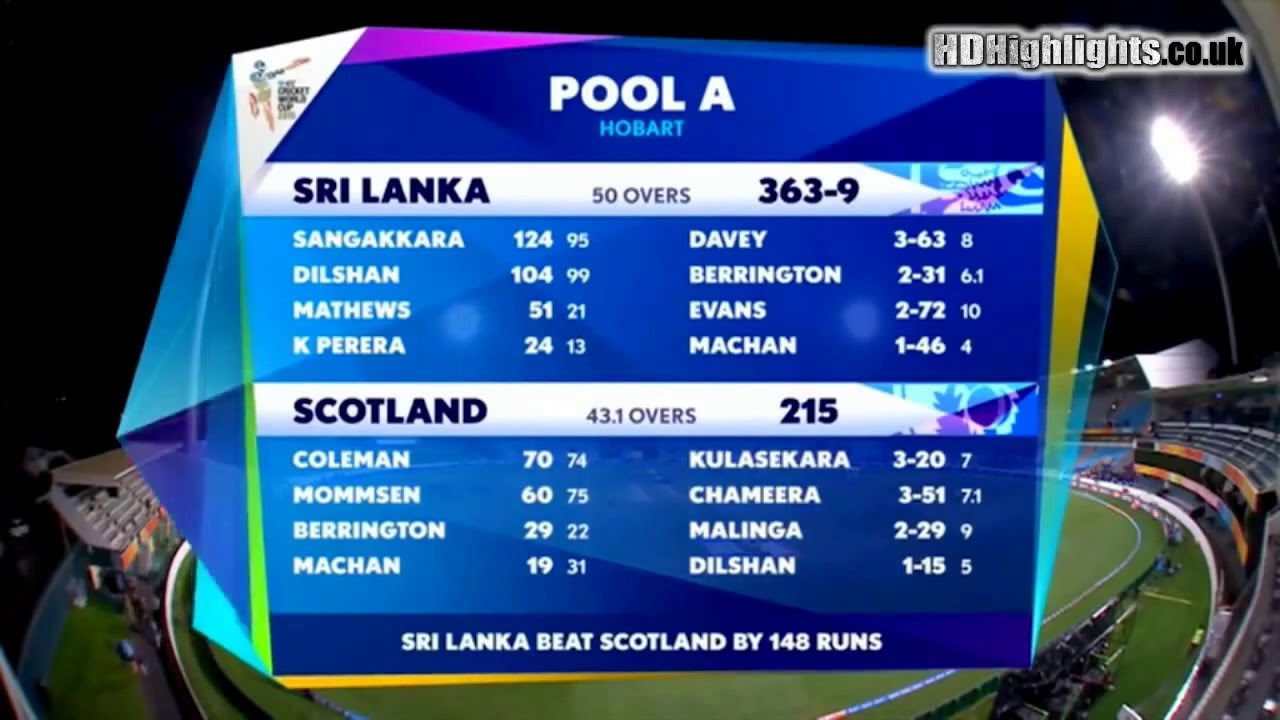

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import package
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
icc_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module - 1/Module 1 - Day 13 /International_T20_Data.csv')

In [ ]:
icc_df.head(2)

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
icc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   innings                      1417 non-null   object 
 1   meta.data_version            1417 non-null   float64
 2   meta.created                 1417 non-null   object 
 3   meta.revision                1417 non-null   int64  
 4   info.dates                   1417 non-null   object 
 5   info.gender                  1417 non-null   object 
 6   info.match_type              1417 non-null   object 
 7   info.outcome.by.wickets      651 non-null    float64
 8   info.outcome.winner          1372 non-null   object 
 9   info.overs                   1417 non-null   int64  
 10  info.player_of_match         1255 non-null   object 
 11  info.teams                   1417 non-null   object 
 12  info.toss.decision           1417 non-null   object 
 13  info.toss.winner  

In [ ]:
icc_df.columns

Index(['innings', 'meta.data_version', 'meta.created', 'meta.revision',
       'info.dates', 'info.gender', 'info.match_type',
       'info.outcome.by.wickets', 'info.outcome.winner', 'info.overs',
       'info.player_of_match', 'info.teams', 'info.toss.decision',
       'info.toss.winner', 'info.umpires', 'info.venue', 'info.city',
       'info.outcome.by.runs', 'info.match_type_number', 'info.neutral_venue',
       'info.outcome.method', 'info.outcome.result', 'info.outcome.eliminator',
       'info.supersubs.New Zealand', 'info.supersubs.South Africa',
       'info.bowl_out', 'info.outcome.bowl_out'],
      dtype='object')

In [ ]:
icc_df.shape

(1417, 27)

In [ ]:
icc_df.isnull().sum()

innings                           0
meta.data_version                 0
meta.created                      0
meta.revision                     0
info.dates                        0
info.gender                       0
info.match_type                   0
info.outcome.by.wickets         766
info.outcome.winner              45
info.overs                        0
info.player_of_match            162
info.teams                        0
info.toss.decision                0
info.toss.winner                  0
info.umpires                     22
info.venue                        0
info.city                       189
info.outcome.by.runs            696
info.match_type_number          733
info.neutral_venue             1089
info.outcome.method            1366
info.outcome.result            1372
info.outcome.eliminator        1401
info.supersubs.New Zealand     1416
info.supersubs.South Africa    1416
info.bowl_out                  1415
info.outcome.bowl_out          1415
dtype: int64

In [ ]:
icc_df_new = icc_df.copy()

**1. Rename the required column names to their appropriate names, for example meta.created should be renamed as created_date**

In [ ]:
# icc_df_new.columns = [x.replace('.','_').replace('info_','').replace('meta_','') for x in list(icc_df_new.columns)]

In [ ]:
# icc_df_new.columns

In [ ]:
icc_df_new.rename(columns = {'meta.created':'date','info.match_type':'format','info.outcome.winner':'winner','info.player_of_match':'man_of_the_match','info.venue':'venue','info.teams':'teams'}, inplace = True)

In [ ]:
icc_df_new.shape

(1417, 27)

In [ ]:
icc_df_newer = icc_df_new[['innings','date','format','winner','venue','teams']].reset_index(drop = True)

In [ ]:
icc_df_newer.shape

(1417, 6)

In [ ]:
icc_df_newer.isnull().sum()

innings     0
date        0
format      0
winner     45
venue       0
teams       0
dtype: int64

In [ ]:
icc_df_newer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   innings  1417 non-null   object
 1   date     1417 non-null   object
 2   format   1417 non-null   object
 3   winner   1372 non-null   object
 4   venue    1417 non-null   object
 5   teams    1417 non-null   object
dtypes: object(6)
memory usage: 66.5+ KB


In [ ]:
def string_to_dict(str):
  return eval(str)

icc_df_newer['innings'] = icc_df_newer['innings'].apply(string_to_dict)

In [ ]:
icc_df_newer['innings'][0]

[{'1st innings': {'team': 'Australia',
   'deliveries': [{0.1: {'batsman': 'AJ Finch',
      'bowler': 'SL Malinga',
      'non_striker': 'M Klinger',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.2: {'batsman': 'AJ Finch',
      'bowler': 'SL Malinga',
      'non_striker': 'M Klinger',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.3: {'batsman': 'AJ Finch',
      'bowler': 'SL Malinga',
      'non_striker': 'M Klinger',
      'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
    {0.4: {'batsman': 'M Klinger',
      'bowler': 'SL Malinga',
      'non_striker': 'AJ Finch',
      'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
    {0.5: {'batsman': 'M Klinger',
      'bowler': 'SL Malinga',
      'non_striker': 'AJ Finch',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.6: {'batsman': 'M Klinger',
      'bowler': 'SL Malinga',
      'non_striker': 'AJ Finch',
      'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
    {1.1: {'batsm

**2. Find out the top three venues which hosted the greatest number of matches.**

In [ ]:
icc_df_newer['venue'].value_counts()[0:3]

Dubai International Cricket Stadium    62
Sheikh Zayed Stadium                   41
Shere Bangla National Stadium          39
Name: venue, dtype: int64

In [ ]:
top_three_venues = pd.DataFrame(icc_df_newer['venue']).value_counts()[0:3].reset_index().rename(columns = {0 : 'count'})
top_three_venues

,venue,count
0,Dubai International Cricket Stadium,62
1,Sheikh Zayed Stadium,41
2,Shere Bangla National Stadium,39


**3. Find out the pair of cricket teams who played the most number of T20 matches against each other.**

In [ ]:
def string_to_list(str):
  return eval(str)

icc_df_newer['teams'] = icc_df_newer['teams'].apply(string_to_list)

In [ ]:
icc_df_newer['teams'].head()

0    [Australia, Sri Lanka]
1    [Australia, Sri Lanka]
2    [Australia, Sri Lanka]
3      [Ireland, Hong Kong]
4         [Zimbabwe, India]
Name: teams, dtype: object

In [ ]:
def sort_teams(team):
  for i in range(0,1417):
    return((sorted(team)))

icc_df_newer['teams'] = icc_df_newer['teams'].apply(sort_teams)

In [ ]:
icc_df_newer[['teams']].head()

,teams
0,"[Australia, Sri Lanka]"
1,"[Australia, Sri Lanka]"
2,"[Australia, Sri Lanka]"
3,"[Hong Kong, Ireland]"
4,"[India, Zimbabwe]"


In [ ]:
teams_with_most_matches = pd.DataFrame(icc_df_newer['teams'].apply(tuple).value_counts().reset_index()).rename( columns={"index": "Teams", "teams": "Number of T20 matches played"})

In [ ]:
teams_with_most_matches.reset_index(drop = True).head(1)

,Teams,Number of T20 matches played
0,"(Australia, England)",45


**4. Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.**

In [ ]:
teams_with_most_matches

,Teams,Number of T20 matches played
0,"(Australia, England)",45
1,"(England, West Indies)",33
2,"(Australia, Pakistan)",33
3,"(Australia, India)",32
4,"(England, Pakistan)",31
...,...,...
305,"(Italy, Jersey)",1
306,"(Denmark, Germany)",1
307,"(Malaysia, Maldives)",1
308,"(Rwanda, Uganda)",1


In [ ]:
matches_sorted = teams_with_most_matches.explode('Teams').sort_values(by = 'Teams')
matches_sorted.head(6)

,Teams,Number of T20 matches played
143,Afghanistan,2
162,Afghanistan,1
206,Afghanistan,1
57,Afghanistan,5
161,Afghanistan,1
131,Afghanistan,2


In [ ]:
matches_per_team = matches_sorted.groupby(['Teams'])['Number of T20 matches played'].sum().reset_index()
matches_per_team.head()

,Teams,Number of T20 matches played
0,Afghanistan,75
1,Australia,214
2,Austria,4
3,Bahrain,2
4,Bangladesh,137


In [ ]:
wins  =  icc_df_newer['winner'].value_counts().reset_index().rename(columns = {'index' : 'Teams', 'winner':'wins'}).sort_values(by = 'Teams')
wins.head()

,Teams,wins
8,Afghanistan,51
0,Australia,132
54,Bahrain,1
9,Bangladesh,50
36,Belgium,3


In [ ]:
teams_wins = matches_per_team.merge(wins, how = 'left').sort_values(by = 'wins', ascending = False).reset_index(drop =True)
teams_wins.fillna(value = 0, inplace = True)
teams_wins.head()

,Teams,Number of T20 matches played,wins
0,Australia,214,132.0
1,England,216,130.0
2,India,204,121.0
3,Pakistan,226,117.0
4,South Africa,192,101.0


In [ ]:
teams_wins['win_percent'] = (teams_wins['wins']/teams_wins['Number of T20 matches played'])*100

In [ ]:
print('The top five teams by their wins are as follows: ')
teams_wins.head()

The top five teams by their wins are as follows: 


,Teams,Number of T20 matches played,wins,win_percent
0,Australia,214,132.0,61.682243
1,England,216,130.0,60.185185
2,India,204,121.0,59.313725
3,Pakistan,226,117.0,51.769912
4,South Africa,192,101.0,52.604167


In [ ]:
print('The top five teams by their win percentages are as follows: ')
teams_wins.sort_values(by = 'win_percent', ascending = False).head()

The top five teams by their win percentages are as follows: 


,Teams,Number of T20 matches played,wins,win_percent
34,Belgium,3,3.0,100.000000
28,Spain,6,5.0,83.333333
22,Germany,17,13.0,76.470588
14,Namibia,34,25.0,73.529412
8,Afghanistan,75,51.0,68.000000


**5. Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.**

In [ ]:
from ast import literal_eval as lit

In [ ]:
def first_innings(innings):
  
  team_batsmen = []
  run_per_ball = []

  for i in lit(innings)[0]['1st innings']['deliveries']:
    team_batsmen.append(list(i.values())[0]['batsman'])
    run_per_ball.append(list(i.values())[0]['runs']['batsman'])

  batsman_score = pd.DataFrame(list(zip(team_batsmen , run_per_ball)), columns = ['team_batsmen','run_per_ball'])
  

  top_4_batsmen = pd.DataFrame(batsman_score.groupby('team_batsmen')['run_per_ball'].sum().sort_index())
  top_4_batsmen['balls_played'] = pd.DataFrame(batsman_score['team_batsmen'].value_counts().sort_index())['team_batsmen']
  top_4_batsmen = top_4_batsmen.sort_values("run_per_ball",ascending=False)[0:4]

  top_4_batsmen['score'] = ''
  for k in top_4_batsmen.index:
    top_4_batsmen['score'][k] = str(top_4_batsmen['run_per_ball'][k]) + '(' + str(top_4_batsmen['balls_played'][k]) + ')'

  top_4_batsmen.drop(['run_per_ball','balls_played'],axis=1,inplace=True)

  team_total_runs = 0
  for l in lit(innings)[0]['1st innings']['deliveries']:
    team_total_runs = team_total_runs + list(l.values())[0]['runs']['total']

  total_wickets = 0
  for m in lit(innings)[0]['1st innings']['deliveries']:
    if 'wicket' in list(m.values())[0].keys():
      total_wickets = total_wickets + 1

  bowler_wickets = {}
  for n in lit(innings)[0]['1st innings']['deliveries']:
    if 'wicket' in list(n.values())[0].keys():
      if list(n.values())[0]["wicket"]['kind'] not in ['run out','retired','obstructing the field','hit the ball twice']:
        if list(n.values())[0]['bowler'] in list(bowler_wickets.keys()):
          bowler_wickets[list(n.values())[0]['bowler']] += 1
        else:
          bowler_wickets[list(n.values())[0]['bowler']] = 1

  no_byes = []
  for o in lit(innings)[0]['1st innings']['deliveries']:
    if "extras" in list(o.values())[0]:
      if list(list(o.values())[0]['extras'].keys())[0] not in ['byes','legbyes']:
       no_byes.append(list(o.values())[0])
    else:
      no_byes.append(list(o.values())[0])

  bowler_conceded = {}
  for i in no_byes:
    if i['bowler'] in list(bowler_conceded.keys()):
      bowler_conceded[i['bowler']] = bowler_conceded[i['bowler']] + i['runs']['total']
    else:
      bowler_conceded[i['bowler']] = i['runs']['total']

  yes_byes = []
  for i in lit(innings)[0]['1st innings']['deliveries']:
    if "extras" in list(i.values())[0]:
      if list(list(i.values())[0]['extras'].keys())[0] in ['byes','legbyes']:
       yes_byes.append(list(i.values())[0])
    else:
      yes_byes.append(list(i.values())[0])

  number_of_balls = []
  for i in yes_byes:
    number_of_balls.append(i['bowler'])

  number_of_balls = pd.DataFrame(pd.DataFrame(number_of_balls).value_counts()/6)

  number_of_balls.rename({0:"no_of_overs"},inplace=True,axis=1)
  number_of_balls.reset_index(inplace=True)
  number_of_balls.rename({0:"Bowler"},inplace=True,axis=1)

  number_of_balls.set_index('Bowler',inplace=True)

  number_of_balls['runs_scored_given'] = ''
  for i in bowler_conceded.keys():
    number_of_balls['runs_scored_given'][i] = bowler_conceded[i]

  number_of_balls['wickets_taken'] = ''
  for i in bowler_wickets.keys():
    number_of_balls['wickets_taken'][i] = bowler_wickets[i]

  number_of_balls['runs_scored_given'].replace({"":0},inplace=True)
  number_of_balls['wickets_taken'].replace({"":0},inplace=True)

  number_of_balls['bowler_economy'] = number_of_balls['runs_scored_given']/number_of_balls['no_of_overs']

  bowler_df = number_of_balls.sort_values(['wickets_taken','bowler_economy'],ascending=[False,True])[:4]

  bowler_df['bowler_stats'] = ''
  for i in bowler_df.index:
    bowler_df['bowler_stats'][i] = str(bowler_df['wickets_taken'][i]) + '-' + str(bowler_df['runs_scored_given'][i]) + "   (" + str(bowler_df['no_of_overs'][i]) + ")"

  bowler_df.drop(['no_of_overs','runs_scored_given','wickets_taken','bowler_economy'],axis=1,inplace=True)
  bowler_df.reset_index(inplace=True)
  top_4_batsmen.reset_index(inplace=True)
  match_result = pd.concat([top_4_batsmen,bowler_df],axis=1)

  match_result['Final Score'] = ''
  match_result['Final Score'][0] = str(team_total_runs) + '-' + str(total_wickets)

  return match_result

In [ ]:
def second_innings(innings):
  
  team_batsmen = []
  run_per_ball = []

  for i in lit(innings)[1]['2nd innings']['deliveries']:
    team_batsmen.append(list(i.values())[0]['batsman'])
    run_per_ball.append(list(i.values())[0]['runs']['batsman'])

  batsman_score = pd.DataFrame(list(zip(team_batsmen , run_per_ball)), columns = ['team_batsmen','run_per_ball'])
  

  top_4_batsmen = pd.DataFrame(batsman_score.groupby('team_batsmen')['run_per_ball'].sum().sort_index())
  top_4_batsmen['balls_played'] = pd.DataFrame(batsman_score['team_batsmen'].value_counts().sort_index())['team_batsmen']
  top_4_batsmen = top_4_batsmen.sort_values("run_per_ball",ascending=False)[0:4]

  top_4_batsmen['score'] = ''
  for k in top_4_batsmen.index:
    top_4_batsmen['score'][k] = str(top_4_batsmen['run_per_ball'][k]) + '(' + str(top_4_batsmen['balls_played'][k]) + ')'

  top_4_batsmen.drop(['run_per_ball','balls_played'],axis=1,inplace=True)

  team_total_runs = 0
  for l in lit(innings)[1]['2nd innings']['deliveries']:
    team_total_runs = team_total_runs + list(l.values())[0]['runs']['total']

  total_wickets = 0
  for m in lit(innings)[1]['2nd innings']['deliveries']:
    if 'wicket' in list(m.values())[0].keys():
      total_wickets = total_wickets + 1

  bowler_wickets = {}
  for n in lit(innings)[1]['2nd innings']['deliveries']:
    if 'wicket' in list(n.values())[0].keys():
      if list(n.values())[0]["wicket"]['kind'] not in ['run out','retired','obstructing the field','hit the ball twice']:
        if list(n.values())[0]['bowler'] in list(bowler_wickets.keys()):
          bowler_wickets[list(n.values())[0]['bowler']] += 1
        else:
          bowler_wickets[list(n.values())[0]['bowler']] = 1

  no_byes = []
  for o in lit(innings)[1]['2nd innings']['deliveries']:
    if "extras" in list(o.values())[0]:
      if list(list(o.values())[0]['extras'].keys())[0] not in ['byes','legbyes']:
       no_byes.append(list(o.values())[0])
    else:
      no_byes.append(list(o.values())[0])

  bowler_conceded = {}
  for i in no_byes:
    if i['bowler'] in list(bowler_conceded.keys()):
      bowler_conceded[i['bowler']] = bowler_conceded[i['bowler']] + i['runs']['total']
    else:
      bowler_conceded[i['bowler']] = i['runs']['total']

  yes_byes = []
  for i in lit(innings)[1]['2nd innings']['deliveries']:
    if "extras" in list(i.values())[0]:
      if list(list(i.values())[0]['extras'].keys())[0] in ['byes','legbyes']:
       yes_byes.append(list(i.values())[0])
    else:
      yes_byes.append(list(i.values())[0])

  number_of_balls = []
  for i in yes_byes:
    number_of_balls.append(i['bowler'])

  number_of_balls = pd.DataFrame(pd.DataFrame(number_of_balls).value_counts()/6)

  number_of_balls.rename({0:"no_of_overs"},inplace=True,axis=1)
  number_of_balls.reset_index(inplace=True)
  number_of_balls.rename({0:"Bowler"},inplace=True,axis=1)

  number_of_balls.set_index('Bowler',inplace=True)

  number_of_balls['runs_scored_given'] = ''
  for i in bowler_conceded.keys():
    number_of_balls['runs_scored_given'][i] = bowler_conceded[i]

  number_of_balls['wickets_taken'] = ''
  for i in bowler_wickets.keys():
    number_of_balls['wickets_taken'][i] = bowler_wickets[i]

  number_of_balls['runs_scored_given'].replace({"":0},inplace=True)
  number_of_balls['wickets_taken'].replace({"":0},inplace=True)

  number_of_balls['bowler_economy'] = number_of_balls['runs_scored_given']/number_of_balls['no_of_overs']

  bowler_df = number_of_balls.sort_values(['wickets_taken','bowler_economy'],ascending=[False,True])[:4]

  bowler_df['bowler_stats'] = ''
  for i in bowler_df.index:
    bowler_df['bowler_stats'][i] = str(bowler_df['wickets_taken'][i]) + '-' + str(bowler_df['runs_scored_given'][i]) + "   (" + str(bowler_df['no_of_overs'][i]) + ")"

  bowler_df.drop(['no_of_overs','runs_scored_given','wickets_taken','bowler_economy'],axis=1,inplace=True)
  bowler_df.reset_index(inplace=True)
  top_4_batsmen.reset_index(inplace=True)
  match_result = pd.concat([top_4_batsmen,bowler_df],axis=1)

  match_result['Final Score'] = ''
  match_result['Final Score'][1] = str(team_total_runs) + '-' + str(total_wickets)

  return match_result

In [ ]:
def final_score_card(innings):
  return pd.concat([first_innings(innings),first_innings(innings)],axis=1)

In [ ]:
final_score_card(icc_df['innings'][0])

,team_batsmen,score,Bowler,bowler_stats,Final Score,team_batsmen,score,Bowler,bowler_stats,Final Score
0,AJ Finch,43(34),SL Malinga,2-29 (4.0),168-6,AJ Finch,43(34),SL Malinga,2-29 (4.0),168-6
1,M Klinger,38(33),PADLR Sandakan,1-30 (4.0),,M Klinger,38(33),PADLR Sandakan,1-30 (4.0),
2,TM Head,31(26),DAS Gunaratne,1-11 (1.0),,TM Head,31(26),DAS Gunaratne,1-11 (1.0),
3,AJ Turner,18(13),JRMVB Sanjaya,1-35 (3.0),,AJ Turner,18(13),JRMVB Sanjaya,1-35 (3.0),
